In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

In [2]:
path_photos = Path(r'D:\projects\ai_pos_terminal\ai_pos_terminal\data\blurred_data')

In [3]:
import cv2
def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F).var()

In [4]:
filenames_images = []
for dirpath, dirnames, filenames in os.walk(path_photos):
    if len(dirnames)==0 and len(filenames):
        filenames_images.extend([str(Path(dirpath) / x) for x in filenames])
    # print(dirpath, dirnames, filenames)

In [38]:
filenames_images[0]

'D:\\projects\\ai_pos_terminal\\ai_pos_terminal\\data\\blurred_data\\blurred\\╨Ч╨Э╨Ю0301516604_TS903153367-01d63991-db4b-471f-9b7d-0a07895aa1e0.jpg'

In [ ]:
'D:/projects/ai_pos_terminal/ai_pos_terminal/data/blurred_data/blurred/╨Ч╨Э╨Ю0301516604_TS903153367-01d63991-db4b-471f-9b7d-0a07895aa1e0.jpg'

In [5]:
from PIL import Image
import numpy as np
from tqdm import tqdm

In [6]:
fms = []
for imagePath in tqdm(filenames_images):
	# load the image, convert it to grayscale, and compute the
	# focus measure of the image using the Variance of Laplacian
	# method
	# image = cv2.imread(imagePath)
	image = Image.open(imagePath)
	gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
	fm = variance_of_laplacian(gray)
	fms.append(fm)

100%|██████████| 1521/1521 [01:15<00:00, 20.20it/s]


In [7]:
df_data = pd.DataFrame(
    {'filename': filenames_images, 
     'fm': fms})
df_data.head()

,filename,fm
0,D:\projects\ai_pos_terminal\ai_pos_terminal\da...,5.645239
1,D:\projects\ai_pos_terminal\ai_pos_terminal\da...,56.838169
2,D:\projects\ai_pos_terminal\ai_pos_terminal\da...,13.649360
3,D:\projects\ai_pos_terminal\ai_pos_terminal\da...,6.277778
4,D:\projects\ai_pos_terminal\ai_pos_terminal\da...,55.023866


In [26]:
df_data.to_excel('consequent_data.xlsx')

In [63]:
df_multiproc = pd.read_excel(r'D:\projects\ai_pos_terminal\ai_pos_terminal\dict_multiproc.xlsx', index_col=[0])

In [93]:
df_data['fm_round'] = df_data['fm'].round(10)
df_multiproc['fm_round'] = df_multiproc['fm'].round(10)

In [94]:
(df_data['fm_round'] - df_multiproc['fm_round']).sum()

0.0

In [61]:
df_data['blurred'] = df_data['filename'].apply(lambda x: '\\blurred\\' in x)

<Axes: xlabel='fm', ylabel='Count'>

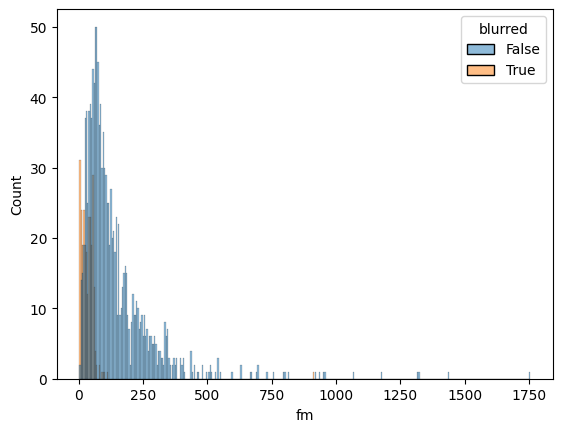

In [67]:
sns.histplot(
    data=df_data, x='fm', hue='blurred', bins=350)

<Axes: xlabel='fm', ylabel='Count'>

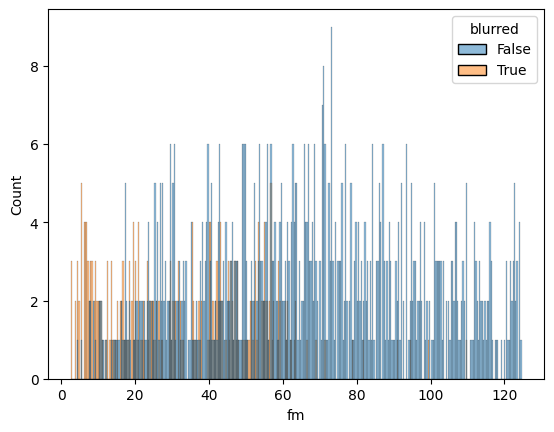

In [68]:
sns.histplot(
    data=df_data[df_data['fm']<125], x='fm', hue='blurred', bins=350)

In [63]:
df_data.loc[df_data['blurred'], 'fm'].describe()

count    267.000000
mean      36.725180
std       57.484179
min        2.578075
25%       16.298787
50%       32.357905
75%       49.915388
max      911.212783
Name: fm, dtype: float64

In [64]:
df_data.loc[~df_data['blurred'], 'fm'].describe()

count    1254.000000
mean      140.767601
std       149.436423
min         4.334036
25%        58.302238
50%        96.606697
75%       174.057298
max      1756.000194
Name: fm, dtype: float64

<Axes: xlabel='fm', ylabel='Count'>

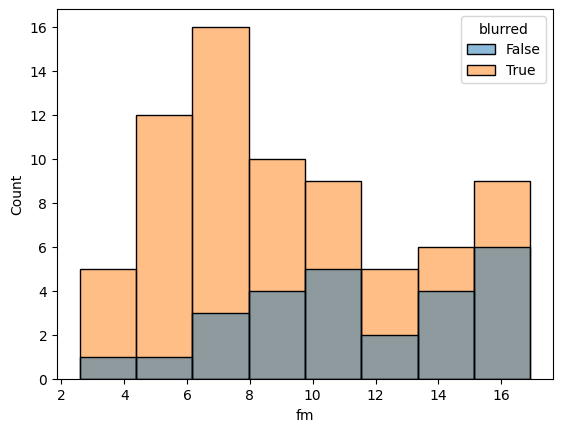

In [66]:
sns.histplot(
    data=df_data[df_data['fm']<17], x='fm', hue='blurred')

In [76]:
import shutil
data_filtered = df_data[df_data['fm']<17]
path_filtered = Path('filtered')
if not os.path.exists(path_filtered): os.makedirs(path_filtered)

for filename in tqdm(data_filtered['filename']):
    shutil.copy(filename, path_filtered)

100%|██████████| 98/98 [00:00<00:00, 1966.08it/s]


In [79]:

path_filtered = Path('false')
if not os.path.exists(path_filtered): os.makedirs(path_filtered)
for filename in tqdm(data_filtered.loc[~data_filtered['blurred'], 'filename']):
    shutil.copy(filename, path_filtered)

100%|██████████| 26/26 [00:00<00:00, 1386.02it/s]


In [ ]:
def variance_of_laplacian(image):
	# compute the Laplacian of the image and then return the focus
	# measure, which is simply the variance of the Laplacian
	return cv2.Laplacian(image, cv2.CV_64F).var()

In [80]:
def foo(L, filename):
	image = Image.open(filename)
	gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
	L.append(cv2.Laplacian(gray, cv2.CV_64F).var())
	# return cv2.Laplacian(gray, cv2.CV_64F).var()

In [83]:
# import multiprocessing

# def double(a):
#     return a * 2

# def driver_func():
#     PROCESSES = 4
#     with multiprocessing.Pool(PROCESSES) as pool:
#         params = [(1, ), (2, ), (3, ), (4, )]
#         results = [pool.apply_async(double, p) for p in params]

#         for r in results:
#             print('\t', r.get())
# driver_func()

In [81]:
# from multiprocessing import Process, Manager

# with Manager() as manager:
#     L = manager.list()  # <-- can be shared between processes.
#     processes = []

#     for filename in filenames_images:
#         p = Process(target=foo, args=(L,filename,))  # Passing the list
#         p.start()
#         processes.append(p)

#     for p in processes:
#         p.join()

#     L = list(L) 

In [ ]:
fms = []
for imagePath in tqdm(filenames_images):
	# load the image, convert it to grayscale, and compute the
	# focus measure of the image using the Variance of Laplacian
	# method
	# image = cv2.imread(imagePath)
	image = Image.open(imagePath)
	gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
	fm = variance_of_laplacian(gray)
	fms.append(fm)